In [4]:
import os
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

in_dir = '/Users/shuchendu/Desktop/toppan/vectorized'
files = [f for f in os.listdir(in_dir)]

# train and test data
#train_month_file, test_month_file = '201801010800.xlsx', '201802010800.xlsx'
train_month_file, test_month_file = '201701010800_vectorized.xlsx', '201702010800_vectorized.xlsx'

In [10]:
def pred_energy(energy, train_month_file, test_month_file):

    train_df = pd.read_excel(os.path.join(in_dir, train_month_file), sheet_name=energy).values
    test_df = pd.read_excel(os.path.join(in_dir, test_month_file), sheet_name=energy).values
    
    train_x, train_y = train_df[:-1, :-1], train_df[1:, -1].reshape(-1, 1)
    test_x, test_y = test_df[:-1, :-1], test_df[1:, -1].reshape(-1, 1)
    
    train_df = np.hstack((train_x, train_y))
    test_df = np.hstack((test_x, test_y))
    
    dtr = DecisionTreeRegressor()
    #dtr = RandomForestRegressor(n_estimators=1000)
    #dtr = GradientBoostingRegressor(n_estimators=1000)
    dtr.fit(train_df[:, :-1], train_df[:, -1])
    
    
    pred_dtr = []
    for test_x in test_df[:, :-1]:
        pred_dtr.append(dtr.predict(test_x.reshape(1, -1))[0])

    plt.figure(figsize=(20, 8))

    plt.plot(pred_dtr, label='pred')
    plt.plot(test_df[:, -1], label='true')
    
    #plt.plot(pred_dtr - test_df[:, -1].ravel(), label='diff')
    
    print('mse: ', mean_squared_error(pred_dtr, test_df[:, -1]))
    
    plt.legend()

mse:  9.52930508982


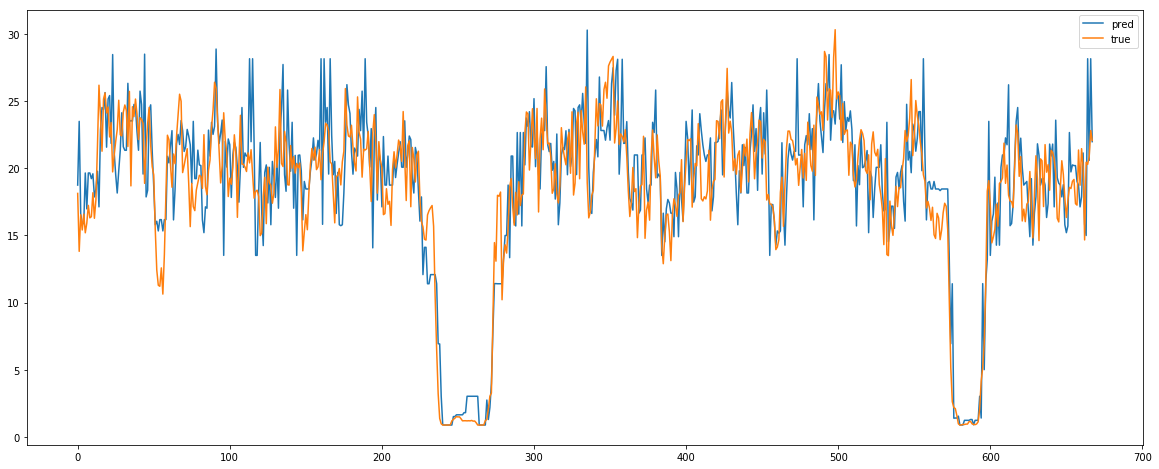

In [11]:
pred_energy('蒸気', train_month_file, test_month_file)

mse:  4.60628742515


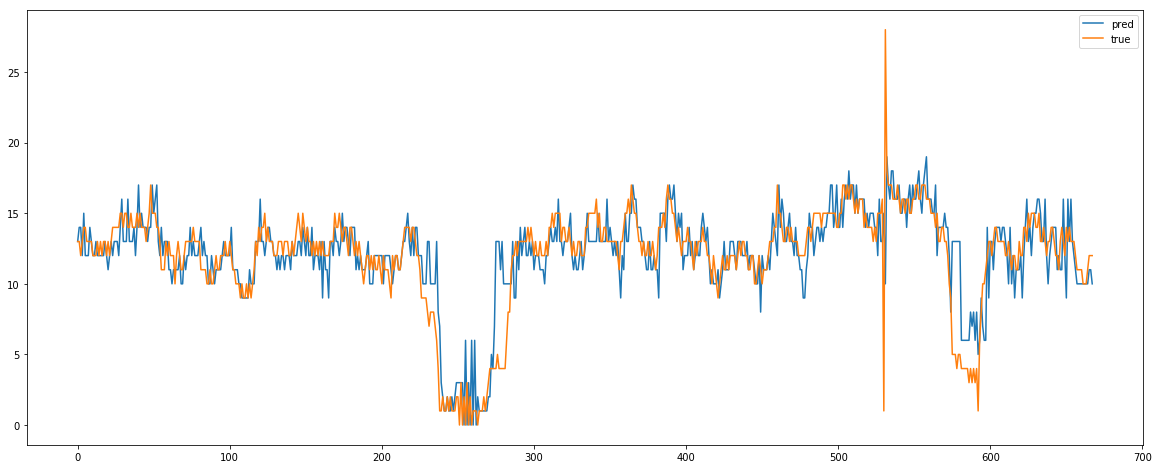

In [12]:
pred_energy('冷水', train_month_file, test_month_file)

mse:  194691.673653


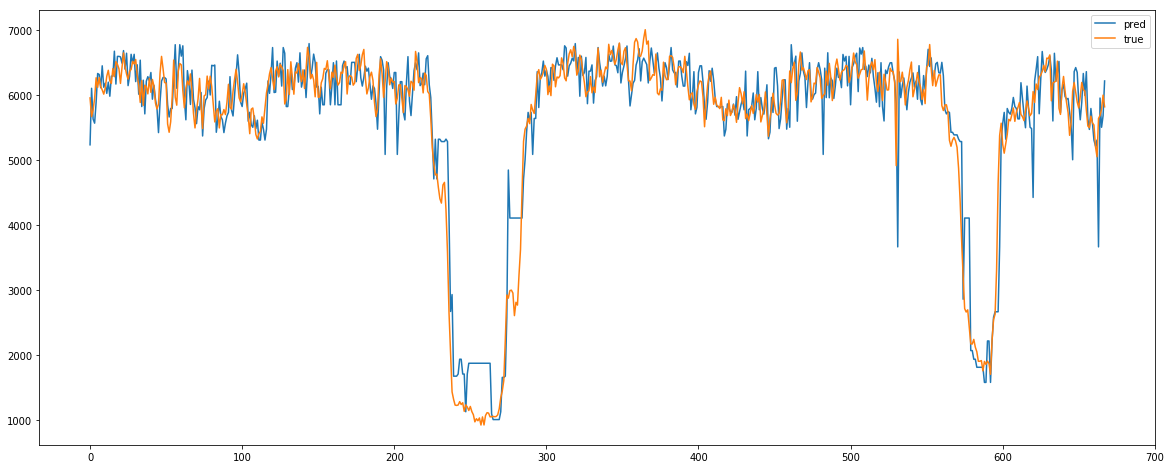

In [13]:
pred_energy('電力', train_month_file, test_month_file)